1.Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = [u'SimSong'] 
plt.rcParams['axes.unicode_minus'] = False 
df = pd.read_csv('/Users/zhangyu/Desktop/Tiktok data analysis project/douyin.txt')
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,time,duration_time
0,18068,138,1312559,27947,23,0,1,0,-1,13717,3085992215,10
1,3456,-1,920393,36070,-1,1,0,0,-1,6895,3082715571,10
2,17128,-1,1201256,14657,11,1,1,0,-1,61358,3084094150,41
3,1368,81,2720842,26944,68,0,0,0,-1,1466,3086505995,10
4,15692,109,691661,18212,213,0,0,0,11513,540,3087035710,10


2.check null values

In [3]:
df.isnull().sum()

uid              0
user_city        0
item_id          0
author_id        0
item_city        0
channel          0
finish           0
like             0
music_id         0
device           0
time             0
duration_time    0
dtype: int64

3. check duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

4. delete duplicates

In [11]:
df.drop_duplicates(inplace=True)

5.reset index

In [12]:
df.reset_index(drop=True,inplace=True)

6. delete missing value

In [13]:
df.replace(to_replace=-1,value=np.nan,inplace=True)

In [14]:
df.isnull().sum()

uid                    0
user_city        1131869
item_id                0
author_id              0
item_city         222116
channel                0
finish                 0
like                   0
music_id         3769681
device                 0
time                   0
duration_time          0
dtype: int64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.shape

(5881778, 12)

7.delete no meaning values

In [18]:
df.drop(labels='device',axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737313 entries, 0 to 1737312
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   uid            int64  
 1   user_city      float64
 2   item_id        int64  
 3   author_id      int64  
 4   item_city      float64
 5   channel        int64  
 6   finish         int64  
 7   like           int64  
 8   music_id       float64
 9   time           int64  
 10  duration_time  int64  
dtypes: float64(3), int64(8)
memory usage: 145.8 MB


In [31]:
import time
t = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(3085992215))
t

'2067-10-16 20:03:35'

8. Convert the "time" column to year-month-day format and add it as a separate column to the table.

In [22]:
real_time = []
for i in df['time']:
    t = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(i))
    real_time.append(t)
df['real_time'] = real_time
df

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time,real_time
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,3087035710,10,2067-10-28 21:55:10
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,3086432823,9,2067-10-21 22:27:03
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,3086786331,10,2067-10-26 00:38:51
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,3086771785,15,2067-10-25 20:36:25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,3086426789,9,2067-10-21 20:46:29
...,...,...,...,...,...,...,...,...,...,...,...,...
1737308,15211,99.0,7835,9723,32.0,0,0,0,558.0,3086844289,3,2067-10-26 16:44:49
1737309,2745,167.0,1221581,38283,140.0,0,1,0,3639.0,3086422147,11,2067-10-21 19:29:07
1737310,14954,271.0,1682866,141744,186.0,0,0,0,238.0,3087039237,9,2067-10-28 22:53:57
1737311,3104,13.0,737785,3482,32.0,0,0,0,10344.0,3086542374,19,2067-10-23 04:52:54


9. real_time break into hour，date column

In [24]:
df['real_time'] = pd.to_datetime(df['real_time'] )
df['hour'] = df.real_time.dt.hour
df['date'] = df.real_time.dt.date
df['date'] = df['date'].astype('str')
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time,real_time,hour,date
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,3087035710,10,2067-10-28 21:55:10,21,2067-10-28
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,3086432823,9,2067-10-21 22:27:03,22,2067-10-21
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,3086786331,10,2067-10-26 00:38:51,0,2067-10-26
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,3086771785,15,2067-10-25 20:36:25,20,2067-10-25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,3086426789,9,2067-10-21 20:46:29,20,2067-10-21


10.View the time range of different dates

In [25]:
df.date.unique()

array(['2067-10-28', '2067-10-21', '2067-10-26', '2067-10-25',
       '2067-10-22', '2067-09-24', '2067-10-27', '2067-10-18',
       '2067-10-06', '2067-10-24', '2067-10-30', '2067-10-16',
       '2067-10-23', '2067-10-20', '2067-10-19', '2067-10-29',
       '2067-10-11', '2067-10-15', '2067-10-04', '2067-10-03',
       '2067-10-07', '2067-10-01', '2067-10-09', '2067-10-17',
       '2067-10-05', '2067-10-13', '2067-09-29', '2067-09-28',
       '2067-10-02', '2067-10-12', '2067-10-14', '2067-09-30',
       '2067-10-10', '2067-09-27', '2067-10-08', '2067-09-25',
       '2067-09-23', '2067-09-22', '2067-09-26', '2067-09-21',
       '2067-02-21'], dtype=object)

11. View the smallest date value

In [26]:
df.date.min()

'2067-02-21'

12. delete date in February

In [27]:
df.drop(labels=df.loc[df.date == '2067-02-21'].index,inplace=True)

In [28]:
df.reset_index(drop=True,inplace=True)

In [29]:
df.shape

(1737312, 14)

13. Calculate tiktok videos views in different channels 

In [30]:
channel = df.groupby(by='channel').count()['uid']
channel

channel
0    1710980
2          2
3      25358
4        972
Name: uid, dtype: int64

Conclusion: As an algorithm-driven short video platform, it's clear that "0" represents a video recommended by the algorithm. Therefore, the key to gaining views on TikTok is to get recommended by the algorithm and enter a larger traffic pool.

14. Relationship between duration_time and number of views

In [33]:
item_duration = df.groupby(by = 'duration_time').count()['uid']
item_duration

duration_time
0         18
1         90
2      18339
3      14337
4      51232
       ...  
119        1
187        2
555        1
620        3
640        6
Name: uid, Length: 72, dtype: int64

Text(0.5, 1.0, 'Relationship between duration_time and number of views')

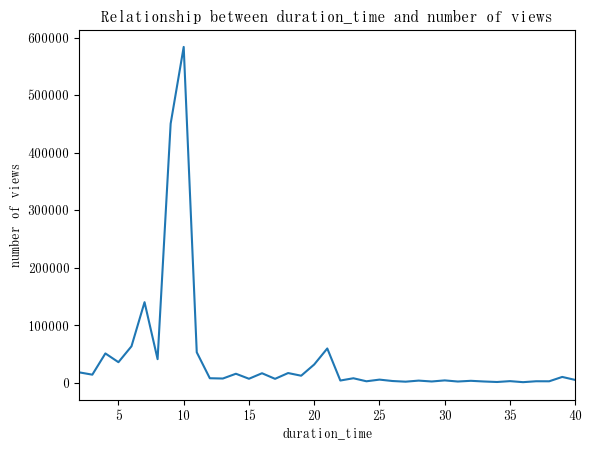

In [35]:
plt.plot(item_duration)
plt.xlim(2,40)
plt.xlabel('duration_time')
plt.ylabel('number of views')
plt.title('Relationship between duration_time and number of views')

15. Relationship between the duration_time of video and number of videos

In [37]:
duration_nums = df.groupby(by='duration_time').count()['item_id'].unique()
duration_nums

array([    18,     90,  18339,  14337,  51232,  36029,  63660, 140248,
        41284, 450360, 583722,  53224,   8147,   7645,  15934,   7238,
        16819,   7099,  17158,  12507,  32057,  59844,   4167,   8109,
         2855,   5743,   3307,   2164,   4012,   2513,   4383,   2436,
         3657,   2497,   1613,   3101,   1318,   2902,   2826,  10406,
         5174,  12517,  14338,      3,      2,    204,      1,      7,
            6,     10])

Text(0.5, 1.0, 'Relationship between the duration_time of video and number of videos')

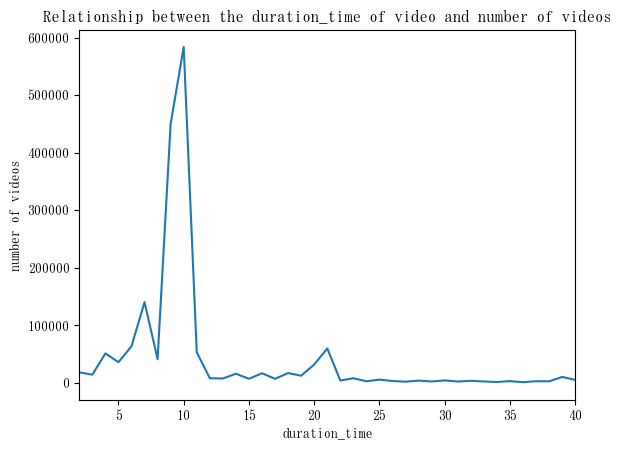

In [38]:
plt.plot(duration_nums)
plt.xlim(2,40)
plt.xlabel('duration_time')
plt.ylabel('number of videos')
plt.title('Relationship between the duration_time of video and number of videos')

15. Relationship between video duration_time and completion rate

Text(0.5, 1.0, 'Relationship between video duration_time and completion rate')

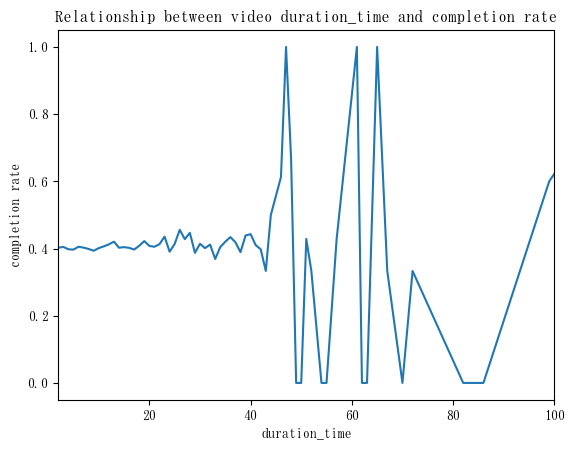

In [63]:
finish_p = df.groupby('duration_time')['finish'].mean()
plt.plot(finish_p)
plt.xlim(2,100)
plt.xlabel('duration_time')
plt.ylabel('completion rate')
plt.title("Relationship between video duration_time and completion rate")

16.Relationship between video duration_time and like rate

Text(0.5, 1.0, 'Relationship between video duration_time and like rate')

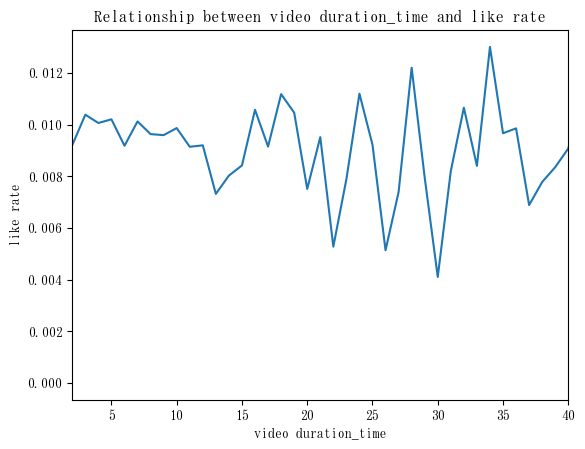

In [64]:
like_p = df.groupby('duration_time')['like'].mean()
plt.plot(like_p)
plt.xlim(2,40)
plt.xlabel('video duration_time')
plt.ylabel('like rate')
plt.title("Relationship between video duration_time and like rate")

Key findings: The majority of videos are between 7-10 seconds, with a significant number falling between 0-22 seconds. 
Videos longer than 22 seconds are rare. Video views distribution has roughly the same pattern as the number of videos.
Completion rate is consistently above 40% between 2-40 seconds, fluctuating drastically after 40 seconds. Therefore, a video length of under 40 seconds is generally recommended.
Like rate remains relatively stable between 2-10 seconds, fluctuating between 0.7%~1.1% between 12-20 seconds, and showing no clear pattern after 20 seconds.
Conclusion: Video length recommended to be between 7~10 seconds, followed by 0~6 seconds or less than 23 seconds. 
A video length exceeding 40 seconds is not recommended.

18. Relationship between the video release time and like rate

In [46]:
h = df.groupby(by='hour')[['finish','like']].mean()
h

,finish,like
hour,,
0,0.403137,0.009347
1,0.407593,0.009439
2,0.409459,0.009949
3,0.395808,0.009494
4,0.409013,0.009718
5,0.405972,0.009695
6,0.399139,0.009223
7,0.396848,0.009766
8,0.398798,0.010154


Text(0.5, 1.0, 'Relationship between the video release time and like rate')

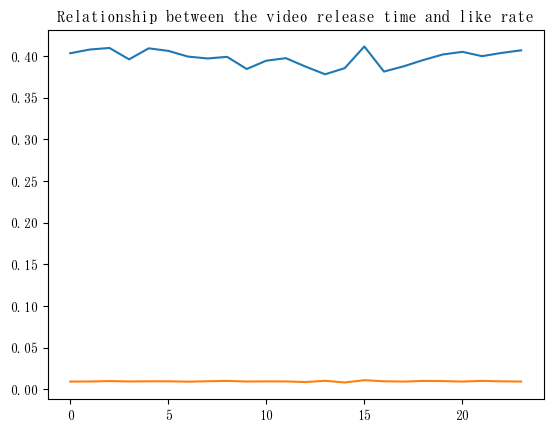

In [47]:
plt.plot(h)
plt.title('Relationship between the video release time and like rate')

19. Relationship between video release time and number of views

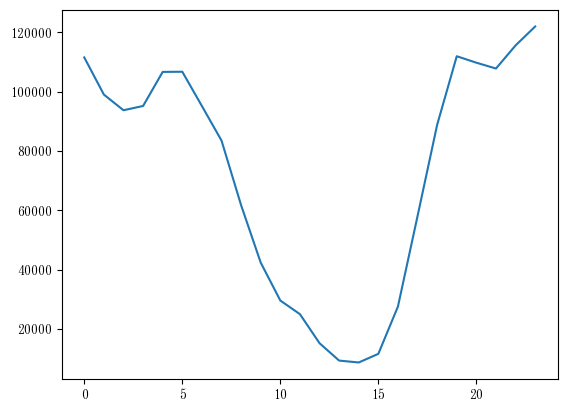

In [48]:
real_time_q = df.groupby(by='hour')['uid'].count()
real_time_q
plt.plot(real_time_q)

20. Relationship between video release time and number of videos

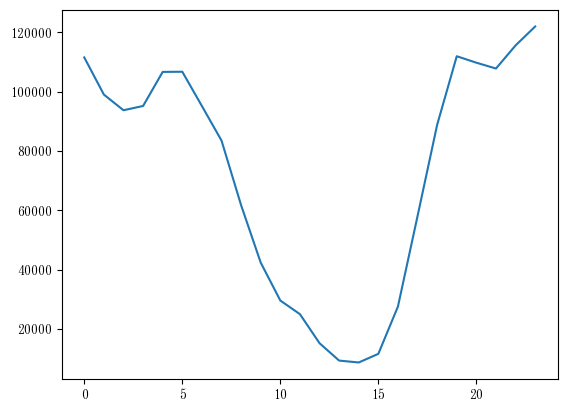

In [49]:
public_item_s = df.groupby(by='hour')['item_id'].count()
public_item_s
plt.plot(public_item_s)

Conclusion: The like rate and completion rate of video released at different times do not change significantly.
            The overall number of views and videos are basically the same. 
            The number of views is slightly higher from 0:00 to 5:00 and 20:00 to 24:00.
            The best time to release a video is from 0:00 to 5:00 and 20:00 to 24:00.

21. Find the top 10 music pieces most frequently used in TikTok videos.

In [50]:
music_ = df.groupby(by='music_id')['uid'].count().sort_values(ascending=False)
top_10_music = music_.iloc[:10]
top_10_music

music_id
22.0     51627
220.0    41412
25.0     27837
68.0     22365
110.0    21087
33.0     17543
468.0    17179
57.0     13347
43.0     13197
238.0    12563
Name: uid, dtype: int64

Text(0.5, 1.0, '')

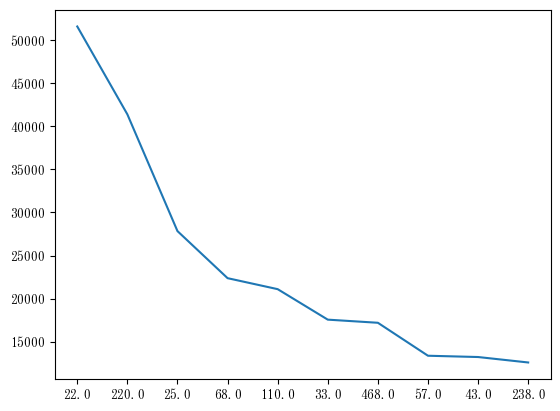

In [51]:
plt.plot(top_10_music.index.astype('str'),top_10_music.values)
plt.title('')

Conclusion: It is recommended to use the top pop songs as video background music, as they are likely to get more views.